In [86]:
import tensorflow as tf
import keras
from keras.layers import Input, Dense, BatchNormalization
from keras.models import Model
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import os
import h5py
import pandas as pd
import numpy as np
from jarvis.db.figshare import data
import csv


In [87]:
df1 = pd.read_csv('data/train.csv')
other = pd.read_csv('data/unique_m.csv')
df = pd.concat([df1,other],axis=1)
original_columns = len(df.columns)
print(df.shape)

(21263, 170)


In [88]:
df = df.T.drop_duplicates().T

In [89]:
df = df.drop('material', axis = 1)

In [90]:
for x in df.columns:
    print(x)

number_of_elements
mean_atomic_mass
wtd_mean_atomic_mass
gmean_atomic_mass
wtd_gmean_atomic_mass
entropy_atomic_mass
wtd_entropy_atomic_mass
range_atomic_mass
wtd_range_atomic_mass
std_atomic_mass
wtd_std_atomic_mass
mean_fie
wtd_mean_fie
gmean_fie
wtd_gmean_fie
entropy_fie
wtd_entropy_fie
range_fie
wtd_range_fie
std_fie
wtd_std_fie
mean_atomic_radius
wtd_mean_atomic_radius
gmean_atomic_radius
wtd_gmean_atomic_radius
entropy_atomic_radius
wtd_entropy_atomic_radius
range_atomic_radius
wtd_range_atomic_radius
std_atomic_radius
wtd_std_atomic_radius
mean_Density
wtd_mean_Density
gmean_Density
wtd_gmean_Density
entropy_Density
wtd_entropy_Density
range_Density
wtd_range_Density
std_Density
wtd_std_Density
mean_ElectronAffinity
wtd_mean_ElectronAffinity
gmean_ElectronAffinity
wtd_gmean_ElectronAffinity
entropy_ElectronAffinity
wtd_entropy_ElectronAffinity
range_ElectronAffinity
wtd_range_ElectronAffinity
std_ElectronAffinity
wtd_std_ElectronAffinity
mean_FusionHeat
wtd_mean_FusionHeat
gmean

In [85]:
df = df.drop(df.columns[[0,1,2,3,4,5,6,7,8,9,10,11]], axis=1)

In [31]:
#df = df[df.critical_temp >25]

In [32]:
#df = df[df.critical_temp != 0]

In [33]:
df = df[df.critical_temp >30 ] 

In [91]:
y = np.asarray(df['critical_temp'])

In [94]:
g = np.exp(0.1515*y.astype('float32'))

In [97]:
g-1.5543

array([79.36884   , 49.812916  , 16.23327   , ..., -0.2044816 ,
       -0.23280978,  5.3988867 ], dtype=float32)

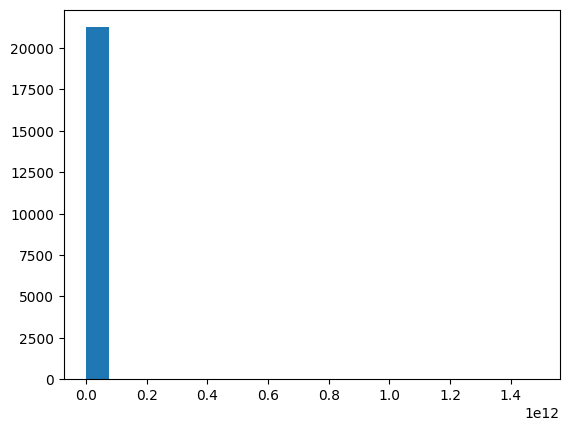

In [113]:
%matplotlib inline
plt.hist(g-1.5543, bins = 20)
plt.show()

In [107]:
plt.show

<function matplotlib.pyplot.show(*, block=None)>

In [114]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('critical_temp', axis=1), df['critical_temp'], test_size=0.2, random_state=42)


In [109]:
len(g-1.543)

21263

In [100]:
Inputs = Input(shape=(159))
x = BatchNormalization()(Inputs)

x = Dense(256, activation='relu', kernel_initializer='lecun_uniform', name='fc1_relu')(x)
x = Dense(128, activation='relu', kernel_initializer='lecun_uniform', name = 'fc2')(x)

x = Dense(64, activation='relu', kernel_initializer='lecun_uniform', name = 'fc3')(x)
x = Dense(32, activation='relu', kernel_initializer='lecun_uniform', name='fc4')(x)
predictions = Dense(1, activation='relu', kernel_initializer='lecun_uniform', name = 'relu')(x)
model = Model(inputs=Inputs, outputs=predictions)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 159)]             0         
                                                                 
 batch_normalization_3 (Batc  (None, 159)              636       
 hNormalization)                                                 
                                                                 
 fc1_relu (Dense)            (None, 256)               40960     
                                                                 
 fc2 (Dense)                 (None, 128)               32896     
                                                                 
 fc3 (Dense)                 (None, 64)                8256      
                                                                 
 fc4 (Dense)                 (None, 32)                2080      
                                                           

In [101]:
adam = Adam(lr=0.0001)
model.compile(optimizer=adam, loss='MSE')

/Users/anrunw/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [102]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)


In [104]:
g-1.

array([80.92314  , 51.367214 , 17.78757  , ...,  1.3498183,  1.3214902,
        6.9531865], dtype=float32)

In [103]:
history = model.fit(np.asarray(X_train).astype('float32'), np.asarray(y_train).astype('float32'), batch_size = 1024, epochs = 1000, 
                    validation_split = 0.25, shuffle = True, callbacks = None,
                    use_multiprocessing=True, workers=4)

Epoch 1/1000
 1/13 [=>............................] - ETA: 3s - loss: 1835440181084160.0000

2023-02-24 15:30:21.444867: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 1s 23ms/step - loss: 173234917908666122240.0000 - val_loss: 2168220958064640.0000
Epoch 2/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234935500852166656.0000 - val_loss: 2168220958064640.0000
Epoch 3/1000


2023-02-24 15:30:21.796645: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 0s 9ms/step - loss: 173234935500852166656.0000 - val_loss: 2168220958064640.0000
Epoch 4/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234917908666122240.0000 - val_loss: 2168220958064640.0000
Epoch 5/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234935500852166656.0000 - val_loss: 2168220958064640.0000
Epoch 6/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234935500852166656.0000 - val_loss: 2168220958064640.0000
Epoch 7/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234935500852166656.0000 - val_loss: 2168220958064640.0000
Epoch 8/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234935500852166656.0000 - val_loss: 2168220958064640.0000
Epoch 9/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234935500852166656.0000 - val_loss: 2168220958064640.0000
Epoch 10/1000
13/13 [==============================] - 0s 8ms/step -

13/13 [==============================] - 0s 8ms/step - loss: 173234935500852166656.0000 - val_loss: 2168118013067264.0000
Epoch 64/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234935500852166656.0000 - val_loss: 2168109960003584.0000
Epoch 65/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234935500852166656.0000 - val_loss: 2168102846464000.0000
Epoch 66/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234935500852166656.0000 - val_loss: 2168094524964864.0000
Epoch 67/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234917908666122240.0000 - val_loss: 2168085398159360.0000
Epoch 68/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234935500852166656.0000 - val_loss: 2168077076660224.0000
Epoch 69/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234935500852166656.0000 - val_loss: 2168066205024256.0000
Epoch 70/1000
13/13 [==============================] - 0s 9ms/

13/13 [==============================] - 0s 8ms/step - loss: 173234935500852166656.0000 - val_loss: 2166287551692800.0000
Epoch 124/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234953093038211072.0000 - val_loss: 2166236280520704.0000
Epoch 125/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234917908666122240.0000 - val_loss: 2166161118593024.0000
Epoch 126/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234935500852166656.0000 - val_loss: 2166087701495808.0000
Epoch 127/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234935500852166656.0000 - val_loss: 2166019921543168.0000
Epoch 128/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234900316480077824.0000 - val_loss: 2165944625397760.0000
Epoch 129/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234935500852166656.0000 - val_loss: 2165865839591424.0000
Epoch 130/1000
13/13 [==============================] - 

Epoch 183/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234882724294033408.0000 - val_loss: 2158563053010944.0000
Epoch 184/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234882724294033408.0000 - val_loss: 2158349244170240.0000
Epoch 185/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234865132107988992.0000 - val_loss: 2158066178981888.0000
Epoch 186/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234865132107988992.0000 - val_loss: 2157786469236736.0000
Epoch 187/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234865132107988992.0000 - val_loss: 2157594806321152.0000
Epoch 188/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234882724294033408.0000 - val_loss: 2157348785225728.0000
Epoch 189/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234882724294033408.0000 - val_loss: 2157121017741312.0000
Epoch 190/1000
13/13 [===================

Epoch 243/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234759578991722496.0000 - val_loss: 2139873100169216.0000
Epoch 244/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234724394619633664.0000 - val_loss: 2139505746247680.0000
Epoch 245/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234777171177766912.0000 - val_loss: 2139060948697088.0000
Epoch 246/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234777171177766912.0000 - val_loss: 2138594542092288.0000
Epoch 247/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234759578991722496.0000 - val_loss: 2138204773810176.0000
Epoch 248/1000
13/13 [==============================] - 0s 9ms/step - loss: 173234724394619633664.0000 - val_loss: 2137828158865408.0000
Epoch 249/1000
13/13 [==============================] - 0s 9ms/step - loss: 173234724394619633664.0000 - val_loss: 2137388998459392.0000
Epoch 250/1000
13/13 [===================

Epoch 303/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234249405596434432.0000 - val_loss: 2115644115910656.0000
Epoch 304/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234231813410390016.0000 - val_loss: 2115375948890112.0000
Epoch 305/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234214221224345600.0000 - val_loss: 2115095568056320.0000
Epoch 306/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234214221224345600.0000 - val_loss: 2114729556312064.0000
Epoch 307/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234179036852256768.0000 - val_loss: 2114405957369856.0000
Epoch 308/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234161444666212352.0000 - val_loss: 2114178726756352.0000
Epoch 309/1000
13/13 [==============================] - 0s 8ms/step - loss: 173234214221224345600.0000 - val_loss: 2113847343185920.0000
Epoch 310/1000
13/13 [===================

Epoch 363/1000
13/13 [==============================] - 0s 9ms/step - loss: 173233264243177947136.0000 - val_loss: 2101695270092800.0000
Epoch 364/1000
13/13 [==============================] - 0s 8ms/step - loss: 173233229058805858304.0000 - val_loss: 2101574876790784.0000
Epoch 365/1000
13/13 [==============================] - 0s 8ms/step - loss: 173233176282247725056.0000 - val_loss: 2101501325475840.0000
Epoch 366/1000
13/13 [==============================] - 0s 9ms/step - loss: 173233229058805858304.0000 - val_loss: 2101401601703936.0000
Epoch 367/1000
13/13 [==============================] - 0s 9ms/step - loss: 173233211466619813888.0000 - val_loss: 2101331808485376.0000
Epoch 368/1000
13/13 [==============================] - 0s 9ms/step - loss: 173233141097875636224.0000 - val_loss: 2101291140513792.0000
Epoch 369/1000
13/13 [==============================] - 0s 11ms/step - loss: 173233070729131458560.0000 - val_loss: 2101213428449280.0000
Epoch 370/1000
13/13 [==================

Epoch 423/1000
13/13 [==============================] - 0s 8ms/step - loss: 173231839276108349440.0000 - val_loss: 2107041699069952.0000
Epoch 424/1000
13/13 [==============================] - 0s 8ms/step - loss: 173231786499550216192.0000 - val_loss: 2107720438120448.0000
Epoch 425/1000
13/13 [==============================] - 0s 8ms/step - loss: 173231751315178127360.0000 - val_loss: 2108214627794944.0000
Epoch 426/1000
13/13 [==============================] - 0s 8ms/step - loss: 173231663354247905280.0000 - val_loss: 2108442529497088.0000
Epoch 427/1000
13/13 [==============================] - 0s 9ms/step - loss: 173231663354247905280.0000 - val_loss: 2108912828416000.0000
Epoch 428/1000
13/13 [==============================] - 0s 10ms/step - loss: 173231592985503727616.0000 - val_loss: 2109177103122432.0000
Epoch 429/1000
13/13 [==============================] - 0s 9ms/step - loss: 173231592985503727616.0000 - val_loss: 2109745917853696.0000
Epoch 430/1000
13/13 [==================

Epoch 483/1000
13/13 [==============================] - 0s 8ms/step - loss: 173229780990341152768.0000 - val_loss: 2150562200027136.0000
Epoch 484/1000
13/13 [==============================] - 0s 8ms/step - loss: 173229605068480708608.0000 - val_loss: 2152026381221888.0000
Epoch 485/1000
13/13 [==============================] - 0s 8ms/step - loss: 173229780990341152768.0000 - val_loss: 2153215147638784.0000
Epoch 486/1000
13/13 [==============================] - 0s 8ms/step - loss: 173229763398155108352.0000 - val_loss: 2154169569902592.0000
Epoch 487/1000
13/13 [==============================] - 0s 8ms/step - loss: 173229728213783019520.0000 - val_loss: 2155021584039936.0000
Epoch 488/1000
13/13 [==============================] - 0s 8ms/step - loss: 173229693029410930688.0000 - val_loss: 2156149952479232.0000
Epoch 489/1000
13/13 [==============================] - 0s 8ms/step - loss: 173229569884108619776.0000 - val_loss: 2157668491853824.0000
Epoch 490/1000
13/13 [===================

Epoch 543/1000
13/13 [==============================] - 0s 9ms/step - loss: 173227494006155378688.0000 - val_loss: 2252374265561088.0000
Epoch 544/1000
13/13 [==============================] - 0s 10ms/step - loss: 173227494006155378688.0000 - val_loss: 2254658651291648.0000
Epoch 545/1000
13/13 [==============================] - 0s 10ms/step - loss: 173227247715550756864.0000 - val_loss: 2256962901245952.0000
Epoch 546/1000
13/13 [==============================] - 0s 9ms/step - loss: 173227335676480978944.0000 - val_loss: 2258011947008000.0000
Epoch 547/1000
13/13 [==============================] - 0s 9ms/step - loss: 173227230123364712448.0000 - val_loss: 2263249659625472.0000
Epoch 548/1000
13/13 [==============================] - 0s 9ms/step - loss: 173227071793690312704.0000 - val_loss: 2265316075765760.0000
Epoch 549/1000
13/13 [==============================] - 0s 8ms/step - loss: 173227247715550756864.0000 - val_loss: 2268752586473472.0000
Epoch 550/1000
13/13 [=================

Epoch 603/1000
13/13 [==============================] - 0s 9ms/step - loss: 173224608887644094464.0000 - val_loss: 2447276123357184.0000
Epoch 604/1000
13/13 [==============================] - 0s 9ms/step - loss: 173224556111085961216.0000 - val_loss: 2450481511137280.0000
Epoch 605/1000
13/13 [==============================] - 0s 8ms/step - loss: 173224274636109250560.0000 - val_loss: 2455596817186816.0000
Epoch 606/1000
13/13 [==============================] - 0s 8ms/step - loss: 173224045937690673152.0000 - val_loss: 2460535224270848.0000
Epoch 607/1000
13/13 [==============================] - 0s 8ms/step - loss: 173224098714248806400.0000 - val_loss: 2462712772689920.0000
Epoch 608/1000
13/13 [==============================] - 0s 8ms/step - loss: 173224063529876717568.0000 - val_loss: 2468575403048960.0000
Epoch 609/1000
13/13 [==============================] - 0s 8ms/step - loss: 173224239451737161728.0000 - val_loss: 2472908219744256.0000
Epoch 610/1000
13/13 [===================

Epoch 663/1000
13/13 [==============================] - 0s 8ms/step - loss: 173220721014528278528.0000 - val_loss: 2781774350385152.0000
Epoch 664/1000
13/13 [==============================] - 0s 8ms/step - loss: 173220826567644545024.0000 - val_loss: 2790695802765312.0000
Epoch 665/1000
13/13 [==============================] - 0s 8ms/step - loss: 173220633053598056448.0000 - val_loss: 2798041002147840.0000
Epoch 666/1000
13/13 [==============================] - 0s 8ms/step - loss: 173220228433319034880.0000 - val_loss: 2802282013917184.0000
Epoch 667/1000
13/13 [==============================] - 0s 8ms/step - loss: 173220527500481789952.0000 - val_loss: 2812151848763392.0000
Epoch 668/1000
13/13 [==============================] - 0s 8ms/step - loss: 173220738606714322944.0000 - val_loss: 2815604465598464.0000
Epoch 669/1000
13/13 [==============================] - 0s 8ms/step - loss: 173220404355179479040.0000 - val_loss: 2823687325614080.0000
Epoch 670/1000
13/13 [===================

Epoch 723/1000
13/13 [==============================] - 0s 9ms/step - loss: 173216446113319485440.0000 - val_loss: 3320520015609856.0000
Epoch 724/1000
13/13 [==============================] - 0s 9ms/step - loss: 173216428521133441024.0000 - val_loss: 3327464172421120.0000
Epoch 725/1000
13/13 [==============================] - 0s 9ms/step - loss: 173216129453970685952.0000 - val_loss: 3339355057815552.0000
Epoch 726/1000
13/13 [==============================] - 0s 9ms/step - loss: 173215795202435842048.0000 - val_loss: 3353817823313920.0000
Epoch 727/1000
13/13 [==============================] - 0s 8ms/step - loss: 173215988716482330624.0000 - val_loss: 3365546842128384.0000
Epoch 728/1000
13/13 [==============================] - 0s 8ms/step - loss: 173216569258621796352.0000 - val_loss: 3370004481310720.0000
Epoch 729/1000
13/13 [==============================] - 0s 9ms/step - loss: 173215496135273086976.0000 - val_loss: 3385272553177088.0000
Epoch 730/1000
13/13 [===================

Epoch 783/1000
13/13 [==============================] - 0s 8ms/step - loss: 173211397155924738048.0000 - val_loss: 4118126849425408.0000
Epoch 784/1000
13/13 [==============================] - 0s 8ms/step - loss: 173211326787180560384.0000 - val_loss: 4133377741422592.0000
Epoch 785/1000
13/13 [==============================] - 0s 8ms/step - loss: 173211766591831670784.0000 - val_loss: 4147223642243072.0000
Epoch 786/1000
13/13 [==============================] - 0s 8ms/step - loss: 173210095334157451264.0000 - val_loss: 4159919834005504.0000
Epoch 787/1000
13/13 [==============================] - 0s 8ms/step - loss: 173210499954436472832.0000 - val_loss: 4175215823159296.0000
Epoch 788/1000
13/13 [==============================] - 0s 8ms/step - loss: 173211361971552649216.0000 - val_loss: 4189155407953920.0000
Epoch 789/1000
13/13 [==============================] - 0s 8ms/step - loss: 173210781429413183488.0000 - val_loss: 4199682104360960.0000
Epoch 790/1000
13/13 [===================

Epoch 843/1000
13/13 [==============================] - 0s 8ms/step - loss: 173205503773599858688.0000 - val_loss: 5134253834633216.0000
Epoch 844/1000
13/13 [==============================] - 0s 8ms/step - loss: 173205873209506791424.0000 - val_loss: 5163298014101504.0000
Epoch 845/1000
13/13 [==============================] - 0s 10ms/step - loss: 173206313014157901824.0000 - val_loss: 5190340201938944.0000
Epoch 846/1000
13/13 [==============================] - 0s 11ms/step - loss: 173204923231460392960.0000 - val_loss: 5207248414441472.0000
Epoch 847/1000
13/13 [==============================] - 0s 12ms/step - loss: 173206700042250878976.0000 - val_loss: 5222526686855168.0000
Epoch 848/1000
13/13 [==============================] - 0s 10ms/step - loss: 173206471343832301568.0000 - val_loss: 5235513057345536.0000
Epoch 849/1000
13/13 [==============================] - 0s 9ms/step - loss: 173205961170437013504.0000 - val_loss: 5265671243956224.0000
Epoch 850/1000
13/13 [===============

13/13 [==============================] - 0s 9ms/step - loss: 173200525184949288960.0000 - val_loss: 6430330009419776.0000
Epoch 903/1000
13/13 [==============================] - 0s 9ms/step - loss: 173201352017693376512.0000 - val_loss: 6452474860797952.0000
Epoch 904/1000
13/13 [==============================] - 0s 8ms/step - loss: 173200824252112044032.0000 - val_loss: 6482205161291776.0000
Epoch 905/1000
13/13 [==============================] - 0s 8ms/step - loss: 173199768720949379072.0000 - val_loss: 6514089924755456.0000
Epoch 906/1000
13/13 [==============================] - 0s 9ms/step - loss: 173200472408391155712.0000 - val_loss: 6538770417451008.0000
Epoch 907/1000
13/13 [==============================] - 0s 9ms/step - loss: 173200138156856311808.0000 - val_loss: 6551340176113664.0000
Epoch 908/1000
13/13 [==============================] - 0s 9ms/step - loss: 173201211280205021184.0000 - val_loss: 6573358862827520.0000
Epoch 909/1000
13/13 [==============================] - 

Epoch 962/1000
13/13 [==============================] - 0s 8ms/step - loss: 173193400349601300480.0000 - val_loss: 8150316771966976.0000
Epoch 963/1000
13/13 [==============================] - 0s 8ms/step - loss: 173194948461973209088.0000 - val_loss: 8172495983083520.0000
Epoch 964/1000
13/13 [==============================] - 0s 8ms/step - loss: 173194191997973299200.0000 - val_loss: 8207980466012160.0000
Epoch 965/1000
13/13 [==============================] - 0s 9ms/step - loss: 173195405858810363904.0000 - val_loss: 8242828756910080.0000
Epoch 966/1000
13/13 [==============================] - 0s 8ms/step - loss: 173194174405787254784.0000 - val_loss: 8256051350601728.0000
Epoch 967/1000
13/13 [==============================] - 0s 8ms/step - loss: 173195229936949919744.0000 - val_loss: 8325197639712768.0000
Epoch 968/1000
13/13 [==============================] - 0s 8ms/step - loss: 173192608701229301760.0000 - val_loss: 8371632141762560.0000
Epoch 969/1000
13/13 [===================

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
def learningCurve(history):
    plt.figure(figsize=(10,8))
    plt.plot(history.history['loss'], linewidth=1)
    plt.plot(history.history['val_loss'], linewidth=1)
    plt.title('Model Loss over Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['training sample loss','validation sample loss'])
    plt.savefig('Learning_curve')
    plt.show
    plt.close()

In [ ]:
learningCurve(history)


In [65]:
model.save_weights('modelJ.h5')
model_json = model.to_json()
with open("modelJ.json", "w") as json_file:
    json_file.write(model_json)

In [66]:
df = df[df.critical_temp >= 10 ] 

In [43]:
df

,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,...,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi
0,1010.268571,718.1529,938.01678,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1010.82,718.1529,939.009036,1.305967,0.77362,810.6,743.164286,323.811808,354.804183,160.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1010.544286,718.1529,938.512777,1.305967,0.783207,810.6,739.575,323.811808,355.183884,160.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1009.717143,718.1529,937.025573,1.305967,0.80523,810.6,728.807143,323.811808,356.319281,160.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,753.793333,651.611213,750.570867,1.371139,0.92705,273.0,427.546667,114.383355,64.428777,176.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21259,989.819048,702.115184,923.426093,1.541006,0.98847,810.6,659.771429,293.286136,345.450969,159.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21260,691.58,730.207231,689.480961,0.688594,0.54212,139.9,370.18,69.95,55.96,183.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21261,706.969,730.207231,704.143255,0.688594,0.648876,139.9,208.799,69.95,64.702805,183.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
np.save('tcPred',df.drop('critical_temp', axis=1).astype('float32'))

In [45]:
np.save('gitCol', df.drop('critical_temp', axis=1).columns)

In [ ]:
df.clo